<a href="https://colab.research.google.com/github/gitflai/CursoDDS/blob/main/Modulo_5_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Combinação de Modelos**

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'
dados = pd.read_csv(url)

In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

In [ ]:
import seaborn as sns

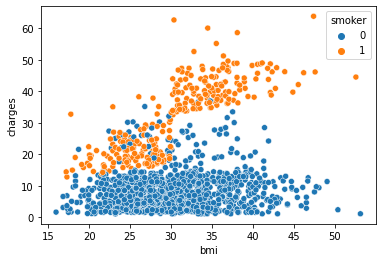

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

In [ ]:
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

## **Validação Cruzada**

In [ ]:
# Configuração da Validação Cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kf = KFold(n_splits = 50, shuffle = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
# Regressão Logistica

modelo = LogisticRegression() 
accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod1 = accs.mean()
print(mod1)

0.9320227920227918


In [ ]:
# KNN

modelo = KNeighborsClassifier(n_neighbors = 25) 
accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod2 = accs.mean()
print(mod2)

0.9604558404558405


In [ ]:
# Árvore de Decisão

modelo = DecisionTreeClassifier(max_depth = 3) 
accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod3 = accs.mean()
print(mod3)

0.9633903133903133


## Combinação por Votos

In [ ]:
# Combinação por votos 'Hard'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')

accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod4 = accs.mean()
print(mod4)

0.9634472934472934


In [ ]:
# Bibliotecas para o gráfico de região

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


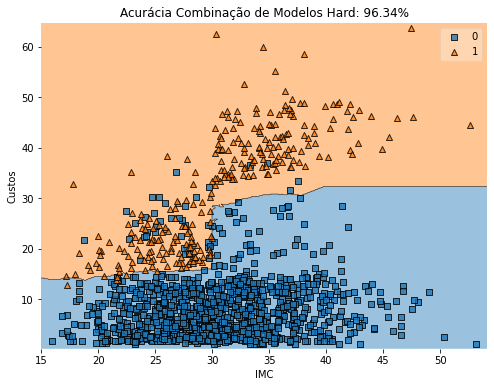

In [ ]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*mod4))  
plt.show() 

In [ ]:
# Combinação por votos 'Soft'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]
modelo = VotingClassifier(estimators = modelos, voting = 'soft')

accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod5 = accs.mean()
print(mod5)

0.9656695156695158


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


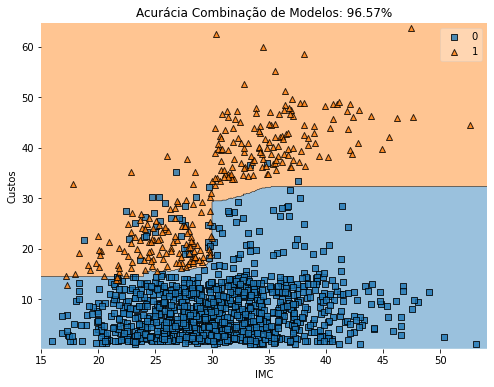

In [ ]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos: {:.2f}%'.format(100*mod5))  
plt.show() 

## Bagging

In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier

modelo_base = LogisticRegression()
#modelo_base = KNeighborsClassifier(n_neighbors = 17)
#modelo_base = DecisionTreeClassifier(max_depth = 3)

modelo = BaggingClassifier(n_estimators = 100, base_estimator = modelo_base) 
accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod6 = accs.mean()
print(mod6)

0.9327635327635326


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


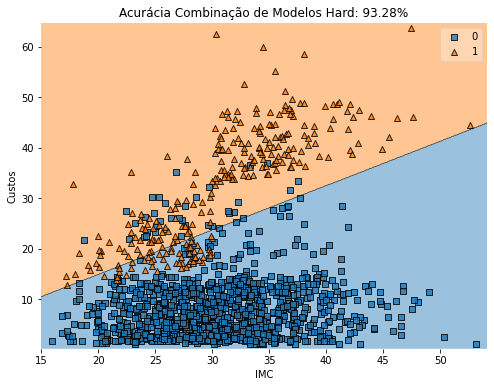

In [ ]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*mod6))  
plt.show() 

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
modelo = RandomForestClassifier(n_estimators = 100, max_depth = 5)
accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
mod7 = accs.mean()
print(mod7)

0.9633903133903133


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


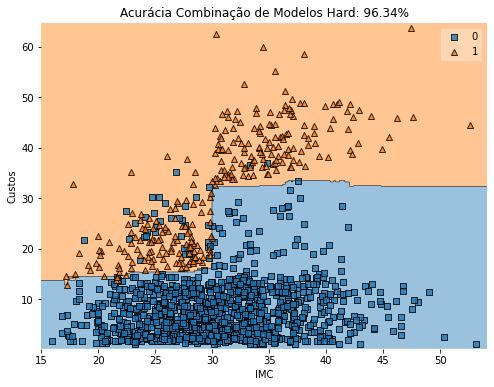

In [ ]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*mod7))  
plt.show() 

In [ ]:
print(mod1, mod2, mod3, mod4, mod5, mod6, mod7)

0.9320227920227918 0.9604558404558405 0.9633903133903133 0.9634472934472934 0.9656695156695158 0.9327635327635326 0.9633903133903133


## Mais métricas de Classificação

## Validação do Modelo - Quero apenas escolher o melhor modelo ou também saber o seu erro de generalização?

In [ ]:
def MetricasClassBinaria(observado, predito):
    from sklearn.metrics import confusion_matrix
    mc = confusion_matrix(observado, predito)
    vn, fp, fn, vp = mc.flatten()

    pre = observado.mean()
    acc = (vn + vp)/(vn + fp + fn + vp) 
    sen = vp/(vp + fn)
    esp = vn/(vn + fp)
    vpp = vp/(vp + fp)
    vpn = vn/(vn + fn) 
    mcc = (vp*vn - fp*fn)/np.sqrt((vp + fp)*(vp + fn)*(vn + fp)*(vn + fn))
    f1s = 2*vpp*sen/(vpp + sen) 
    efi = (sen + esp)/2

    print('  Prevalência de Positivos: {:.4f}'.format(pre))
    print('                  Acurácia: {:.4f}'.format(acc))
    print('             Sensibilidade: {:.4f}'.format(sen))
    print('            Especificidade: {:.4f}'.format(esp))
    print('  Valor Preditivo Positivo: {:.4f}'.format(vpp))
    print('  Valor Preditivo Negativo: {:.4f}'.format(vpn))
    print('Coef. de Corr. de Matthews: {:.4f}'.format(mcc))
    print('                  F1-Score: {:.4f}'.format(f1s))
    print('                Eficiência: {:.4f}'.format(efi))
 
    metricas = {'prevalência': pre, 'acurácia': acc, 'sensibilidade': sen, 
            'especificidade': esp, 'vpp': vpp, 'vpn': vpn, 'mcc': mcc,
            'f1-score': f1s, 'eficiência': efi}
 
    return metricas



In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#Fazendo a Divisão em Teste e Treinamento
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.20)

In [ ]:
modelo = LogisticRegression()
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas1 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.1978
                  Acurácia: 0.9403
             Sensibilidade: 0.8302
            Especificidade: 0.9674
  Valor Preditivo Positivo: 0.8627
  Valor Preditivo Negativo: 0.9585
Coef. de Corr. de Matthews: 0.8094
                  F1-Score: 0.8462
                Eficiência: 0.8988


In [ ]:
modelo = KNeighborsClassifier(n_neighbors = 25)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas2 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.1978
                  Acurácia: 0.9552
             Sensibilidade: 0.9623
            Especificidade: 0.9535
  Valor Preditivo Positivo: 0.8361
  Valor Preditivo Negativo: 0.9903
Coef. de Corr. de Matthews: 0.8699
                  F1-Score: 0.8947
                Eficiência: 0.9579


In [ ]:
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas3 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.1978
                  Acurácia: 0.9627
             Sensibilidade: 0.9811
            Especificidade: 0.9581
  Valor Preditivo Positivo: 0.8525
  Valor Preditivo Negativo: 0.9952
Coef. de Corr. de Matthews: 0.8923
                  F1-Score: 0.9123
                Eficiência: 0.9696


In [ ]:
modelo = VotingClassifier(estimators = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)], voting = 'hard')
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas4 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.1978
                  Acurácia: 0.9590
             Sensibilidade: 0.9623
            Especificidade: 0.9581
  Valor Preditivo Positivo: 0.8500
  Valor Preditivo Negativo: 0.9904
Coef. de Corr. de Matthews: 0.8795
                  F1-Score: 0.9027
                Eficiência: 0.9602


In [ ]:
modelo = VotingClassifier(estimators = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)], voting = 'soft')
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas5 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.1978
                  Acurácia: 0.9627
             Sensibilidade: 0.9811
            Especificidade: 0.9581
  Valor Preditivo Positivo: 0.8525
  Valor Preditivo Negativo: 0.9952
Coef. de Corr. de Matthews: 0.8923
                  F1-Score: 0.9123
                Eficiência: 0.9696


In [ ]:
modelo = BaggingClassifier(n_estimators = 100)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas6 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.1978
                  Acurácia: 0.9664
             Sensibilidade: 0.9623
            Especificidade: 0.9674
  Valor Preditivo Positivo: 0.8793
  Valor Preditivo Negativo: 0.9905
Coef. de Corr. de Matthews: 0.8992
                  F1-Score: 0.9189
                Eficiência: 0.9649


In [ ]:
modelo = RandomForestClassifier(n_estimators = 200, max_depth = 7) 
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas7 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.1978
                  Acurácia: 0.9590
             Sensibilidade: 0.9623
            Especificidade: 0.9581
  Valor Preditivo Positivo: 0.8500
  Valor Preditivo Negativo: 0.9904
Coef. de Corr. de Matthews: 0.8795
                  F1-Score: 0.9027
                Eficiência: 0.9602


In [ ]:
 resultados0 = {'Regressão Logística': list(metricas1.values()),
              '25-Vizinhos + Próximos': list(metricas2.values()),
              'Árvore de Decisão': list(metricas3.values()),
              'Combinação Hard': list(metricas4.values()),
              'Combinação Soft': list(metricas5.values()),
              'Bagging': list(metricas6.values()),
              'Random Forest': list(metricas7.values())}
              
resultados = pd.DataFrame(resultados0, index = metricas1.keys()).T
resultados

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência
Regressão Logística,0.197761,0.940299,0.830189,0.967442,0.862745,0.958525,0.809364,0.846154,0.898815
25-Vizinhos + Próximos,0.197761,0.955224,0.962264,0.953488,0.836066,0.990338,0.869932,0.894737,0.957876
Árvore de Decisão,0.197761,0.962687,0.981132,0.958140,0.852459,0.995169,0.892274,0.912281,0.969636
Combinação Hard,0.197761,0.958955,0.962264,0.958140,0.850000,0.990385,0.879485,0.902655,0.960202
Combinação Soft,0.197761,0.962687,0.981132,0.958140,0.852459,0.995169,0.892274,0.912281,0.969636
Bagging,0.197761,0.966418,0.962264,0.967442,0.879310,0.990476,0.899247,0.918919,0.964853
Random Forest,0.197761,0.958955,0.962264,0.958140,0.850000,0.990385,0.879485,0.902655,0.960202


In [ ]:
resultados.sort_values(by = 'acurácia', ascending = False)

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência
Árvore de Decisão,0.179104,0.966418,0.979167,0.963636,0.854545,0.995305,0.895121,0.912621,0.971402
Combinação Soft,0.179104,0.966418,0.958333,0.968182,0.867925,0.990698,0.891923,0.910891,0.963258
Random Forest,0.179104,0.962687,0.958333,0.963636,0.851852,0.990654,0.881343,0.901961,0.960985
25-Vizinhos + Próximos,0.179104,0.958955,0.937500,0.963636,0.849057,0.986047,0.867492,0.891089,0.950568
Combinação Hard,0.179104,0.958955,0.937500,0.963636,0.849057,0.986047,0.867492,0.891089,0.950568
Bagging,0.179104,0.958955,0.916667,0.968182,0.862745,0.981567,0.864343,0.888889,0.942424
Regressão Logística,0.179104,0.929104,0.770833,0.963636,0.822222,0.950673,0.753437,0.795699,0.867235


In [ ]:
from google.colab.data_table import DataTable
DataTable(resultados.round(4))

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência
Regressão Logística,0.1978,0.9403,0.8302,0.9674,0.8627,0.9585,0.8094,0.8462,0.8988
25-Vizinhos + Próximos,0.1978,0.9552,0.9623,0.9535,0.8361,0.9903,0.8699,0.8947,0.9579
Árvore de Decisão,0.1978,0.9627,0.9811,0.9581,0.8525,0.9952,0.8923,0.9123,0.9696
Combinação Hard,0.1978,0.9590,0.9623,0.9581,0.8500,0.9904,0.8795,0.9027,0.9602
Combinação Soft,0.1978,0.9627,0.9811,0.9581,0.8525,0.9952,0.8923,0.9123,0.9696
Bagging,0.1978,0.9664,0.9623,0.9674,0.8793,0.9905,0.8992,0.9189,0.9649
Random Forest,0.1978,0.9590,0.9623,0.9581,0.8500,0.9904,0.8795,0.9027,0.9602


## **Exercício:** Faça repetições do procedimento acima para ter acesso a medidas mais estáveis sobre a performance de generalização dos modelos.